The following code trains and tests models on the Cat Recognition dataset with a varying number of layers, and then plots graphs of Test Prediction Accuracy against Layer Count and Training Time against Layer Count.

'Progress: Complete'

Training Times Regression Line Gradient: 3.03


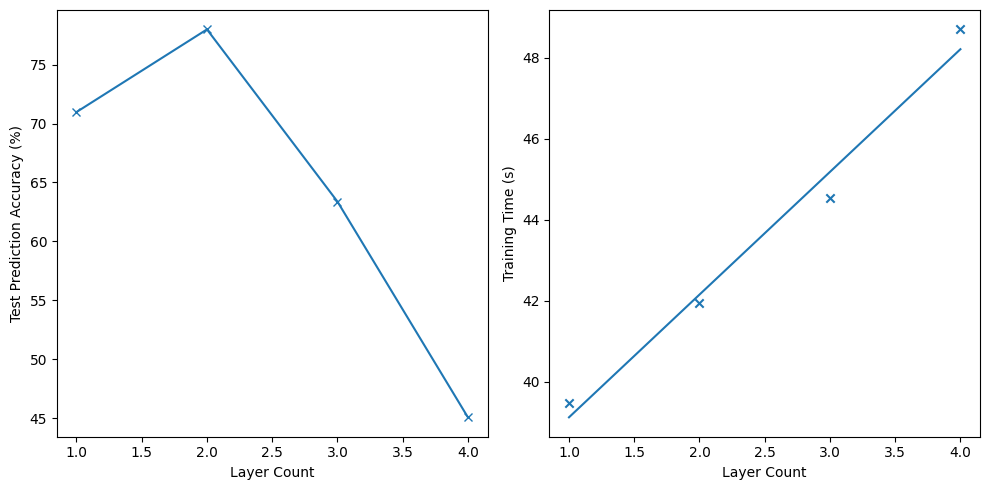

In [1]:
from IPython.display import clear_output, display
import os

import matplotlib.pyplot as plt
import numpy as np

from school_project.models.gpu.cat_recognition import CatRecognitionModel as Model

# Change to root directory of project
os.chdir(os.getcwd())

# Set width and height of figure
plt.rcParams["figure.figsize"] = [10, 5]

layer_counts = np.array(list(range(1, 5)))
neuron_count = 100
test_prediction_accuracies = np.array([])
training_times = np.array([])

for index, layer_count in enumerate(layer_counts):
    clear_output(wait=True)
    display(f"Progress: {round(number=index/len(layer_counts) * 100, ndigits=2)}%")

    model = Model(
           hidden_layers_shape=[neuron_count for layer in range(layer_count)],
           train_dataset_size=209,
           learning_rate=0.1,
           use_relu=True
           )
    model.create_model_values()
    model.train(epoch_count=3_500)
    model.test()

    test_prediction_accuracies = np.append(test_prediction_accuracies,
                                            model.test_prediction_accuracy)
    training_times = np.append(training_times,
                                model.training_time)

clear_output(wait=True)
display("Progress: Complete")

figure, axis = plt.subplots(nrows=1, ncols=2)

axis[0].set_xlabel("Layer Count")
axis[0].set_ylabel("Test Prediction Accuracy (%)")

axis[0].plot(layer_counts, test_prediction_accuracies, marker='x')

# Determine gradient and y-intercept of training times regression line
m, c = np.polyfit(layer_counts, training_times, deg=1)
print(f"Training Times Regression Line Gradient: {round(number=m, ndigits=2)}")

axis[1].set_xlabel("Layer Count")
axis[1].set_ylabel("Training Time (s)")

# Plot scatter graph of layer Counts and training times
axis[1].scatter(layer_counts, training_times, marker='x')

# Plot regression line
axis[1].plot(layer_counts, m * layer_counts + c)

plt.tight_layout()
plt.show()

As shown above, as the layer count increases so does the training time taken and the test prediction accuracy at first. However, as the layer count continued to increase the prediction accuracy began to drop greatly (after 2 layers in this case). This is most likely due to the model overfitting and learning the training dataset too closely, causing it to fail on the new inputs of the test dataset.